In [22]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp

In [23]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


In [24]:
CODE='Python'
SIN_SOURCE='Lib'

In [25]:
df = pd.read_csv(f"../{CODE}/Output/FFT_Step_6_{SIN_SOURCE}.txt", sep='\t')
df.columns

Index(['SinSource', 'NoiseType', 'Noise', 'Signal', 'Order', 'Freq', 'Test',
       'Step', 'Imag', 'Value', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63'],
      dtype='object')

# SciPy fft freq vs wave

In [26]:
def getScipy( freq, test, order, signalType ):
    size = 1 << order
    if signalType == 'Sin':
        sWave = [math.sin(math.pi*2*freq *i/size) for i in range(0,size)]
        sFreq = [0] * size
        sFreq[freq] = -size *0.5j
        sFreq[size - freq] = +size *0.5j
    elif signalType == 'Cos':
        sWave = [math.cos(math.pi*2*freq *i/size) for i in range(0,size)]
        sFreq = [0] * size
        sFreq[freq] = size *0.5
        sFreq[size - freq] = size *0.5
        
    if test == 'Forward':
        sRes = sp.fft.fft(sWave, n=size)
        sError = sRes - sFreq
    elif test == 'Reverse':
        sRes = sp.fft.ifft(sFreq, n=size)
        sError = sRes - sWave
    elif test == 'Roundtrip':
        sRes = sp.fft.ifft( sp.fft.fft(sWave, n=size), n=size)
        sError = sRes - sWave
    else:
        raise ValueError(f'Invalid test={test}')
    
    return sRes, sError

In [27]:
sRes, sError = getScipy( 1, 'Forward', 3, 'Sin' )
print(sRes)

[ 1.22464680e-16-0.00000000e+00j -3.44509285e-16-4.00000000e+00j
  1.22464680e-16-2.22044605e-16j  9.95799250e-17+0.00000000e+00j
  1.22464680e-16-0.00000000e+00j  9.95799250e-17-0.00000000e+00j
  1.22464680e-16+2.22044605e-16j -3.44509285e-16+4.00000000e+00j]


In [28]:
sRes, sError = getScipy( 1, 'Reverse', 3, 'Sin' )
print(sRes)

[ 0.        +0.j  0.70710678+0.j  1.        +0.j  0.70710678+0.j
  0.        +0.j -0.70710678+0.j -1.        +0.j -0.70710678+0.j]


In [29]:
sRes, sError = getScipy( 1, 'Forward', 3, 'Cos' )
print(sRes)

[-3.44509285e-16-0.00000000e+00j  4.00000000e+00-4.66973965e-16j
  1.22464680e-16-0.00000000e+00j  0.00000000e+00+2.28847549e-17j
  9.95799250e-17-0.00000000e+00j  0.00000000e+00-2.28847549e-17j
  1.22464680e-16+0.00000000e+00j  4.00000000e+00+4.66973965e-16j]


In [30]:
sRes, sError = getScipy( 1, 'Reverse', 3, 'Cos' )
print(sRes)

[ 1.        -0.j  0.70710678-0.j  0.        +0.j -0.70710678-0.j
 -1.        -0.j -0.70710678+0.j  0.        -0.j  0.70710678+0.j]


In [31]:
def PlotOutput( freq, test, order=6, signalType='Sin', noiseType='Gaussian', noise=0 ):
    sIndex = [str(i) for i in range(2**order)]
    df['Imag Name'] = np.where(df['Imag'], 'Imag ', 'Real ')
    df['Value Name'] = np.where(df['Value'], 'Value Error', 'Uncertainty')
    df['Legend'] = df['Imag Name'] + df['Value Name']
    df.set_index('Legend')
    dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise) & (df['Step']==(order + 4)) &
                (df['Signal']==signalType) & (df['Freq']==freq) & (df['Test']==test)].set_index('Legend')
    ax = dfPlot[sIndex].T.plot(style=['--', ':']*2, color=['black']*2+['gray']*2, grid=True, 
            xlabel=f'{"Frequence" if test == "Forward" else "Time"} Index j', ylabel='Value Error or Uncertainty',
            title=f'${signalType}(2\pi\; {freq} \;j/2^{order})$ {test} {SIN_SOURCE} noise={noise}')
    
    _, sError = getScipy( freq, test, order, signalType)
    sReal = np.array([c.real() if type(c) == complex else c for c in sError])
    ax.plot(range(len(sError)), sReal, 'kx', label=f'SciPy Error Real')
    sImag = np.array([c.imag() if type(c) == complex else 0 for c in sError])
    ax.plot(range(len(sError)), sImag, color='gray', ls='', marker='+', label=f'SciPy Error Imag')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1.0))

# Sin

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: Complex

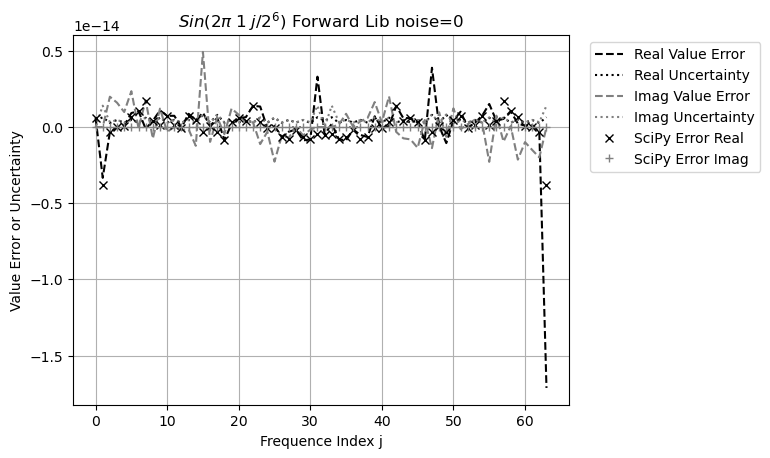

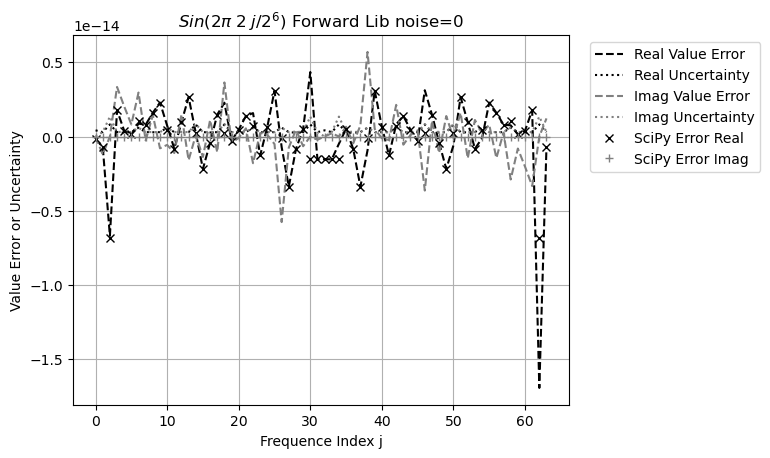

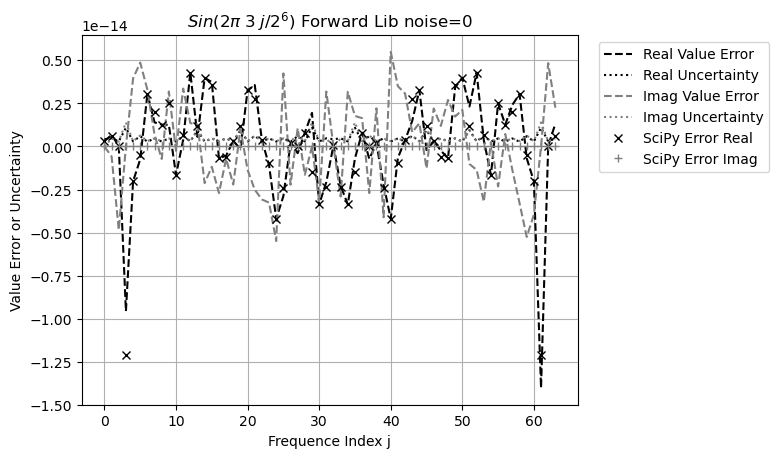

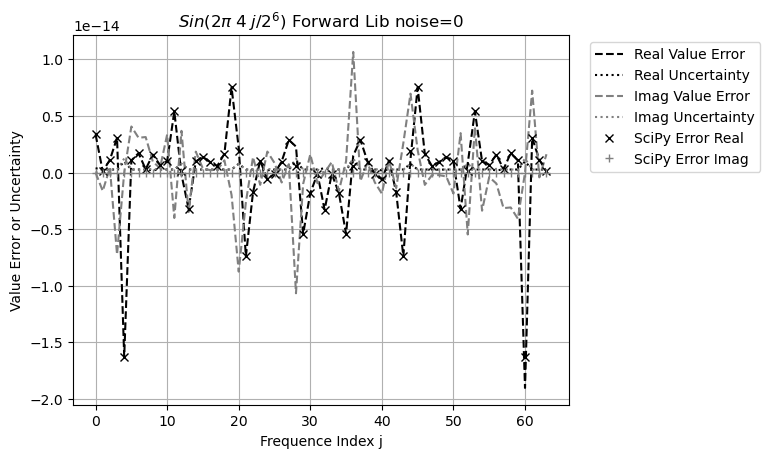

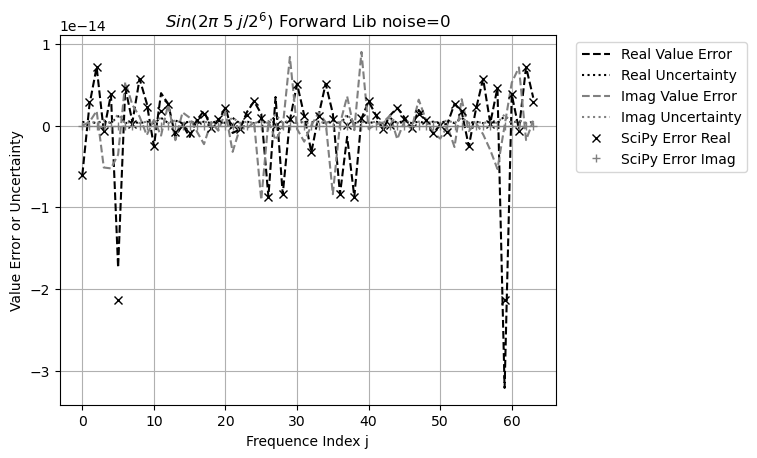

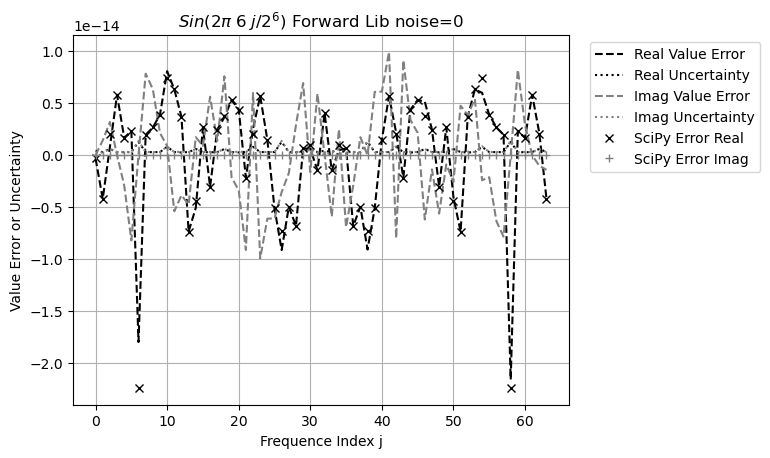

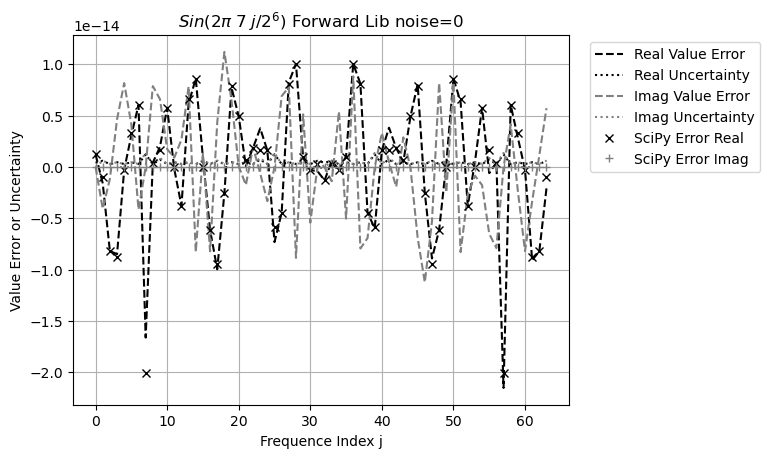

In [32]:
for freq in range(1, 8):
    PlotOutput(freq, 'Forward')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: Complex

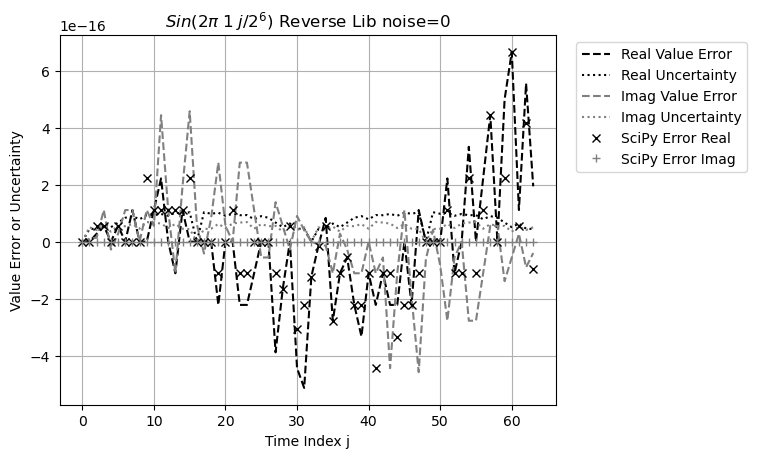

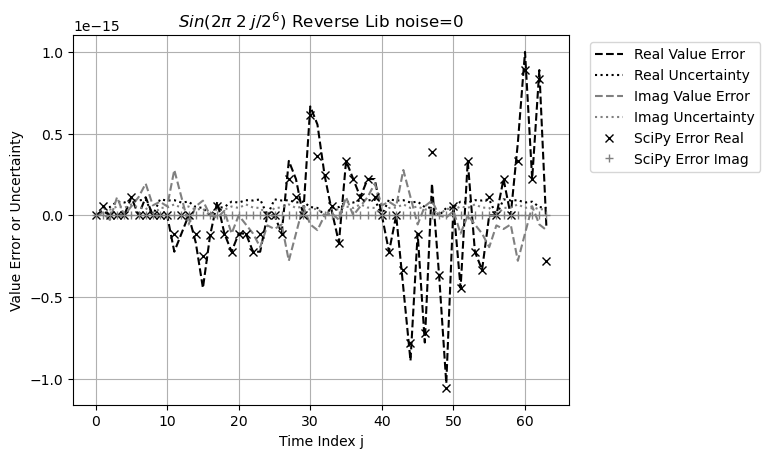

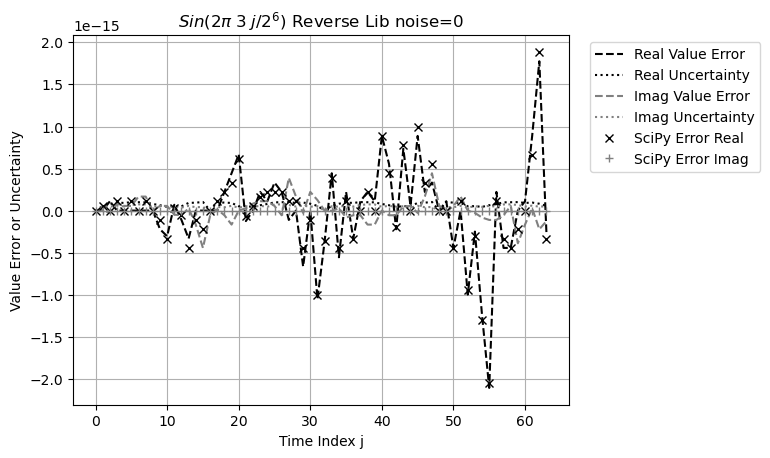

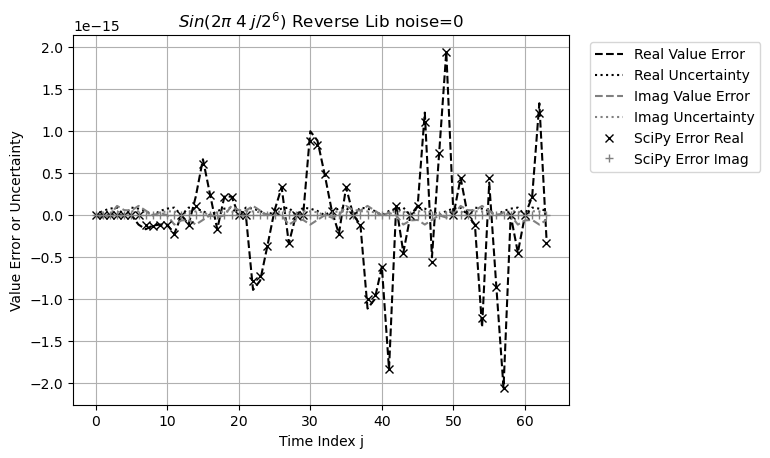

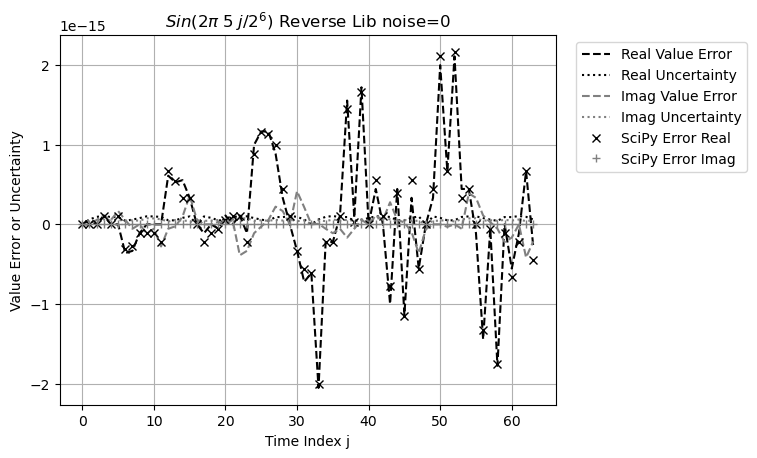

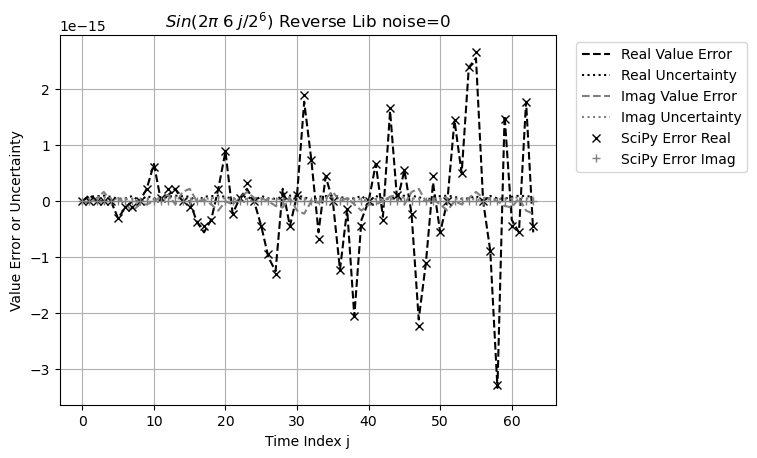

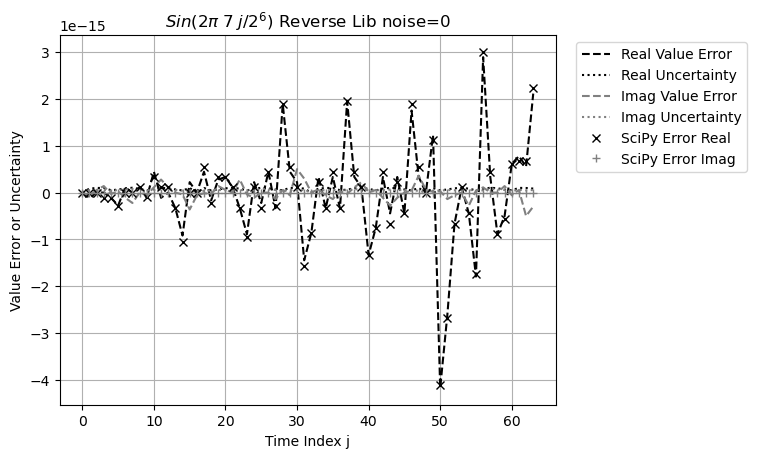

In [33]:
for freq in range(1, 8):
    PlotOutput(freq, 'Reverse')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: Complex

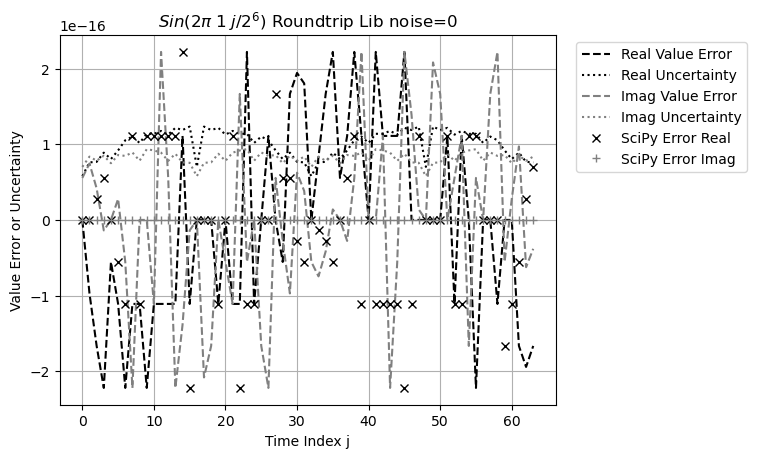

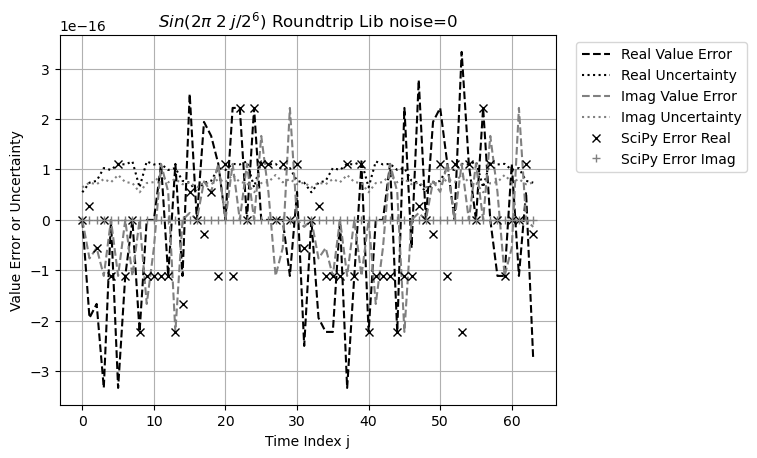

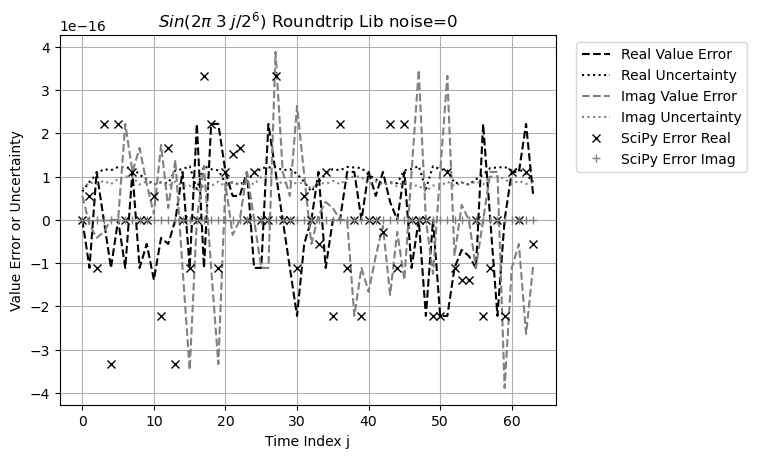

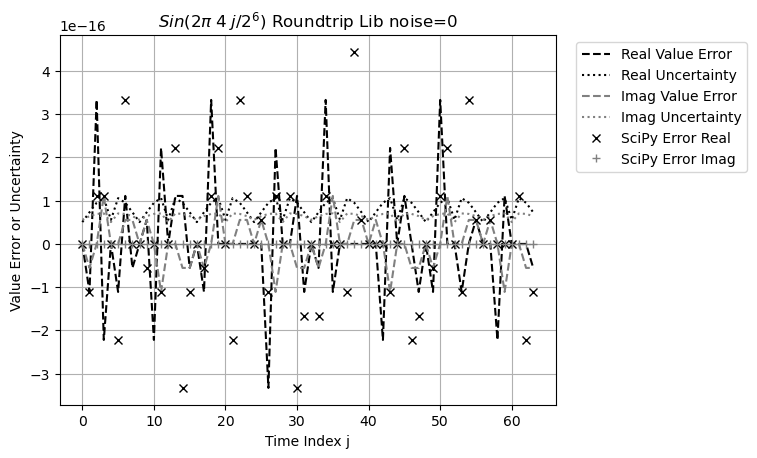

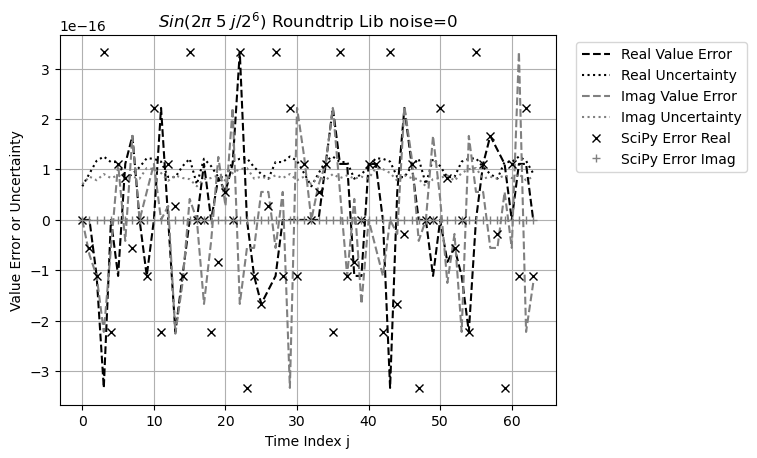

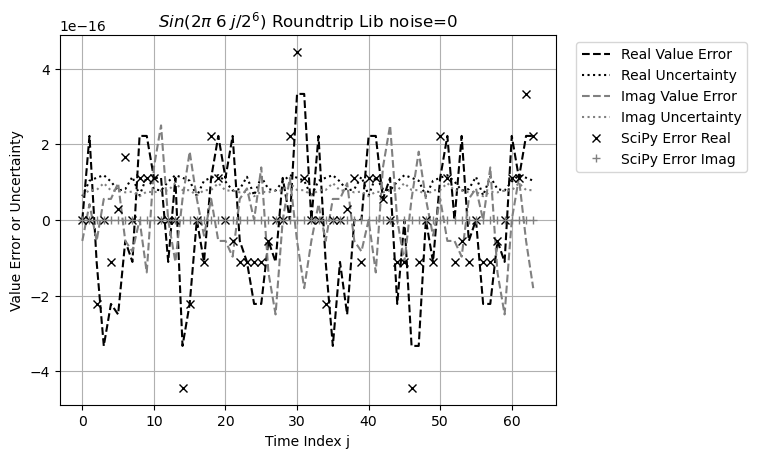

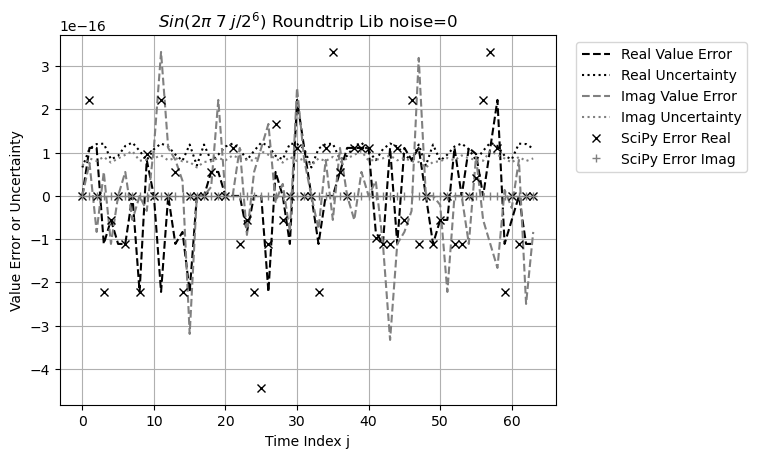

In [34]:
for freq in range(1, 8):
    PlotOutput(freq, 'Roundtrip')

# Cos

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: Complex

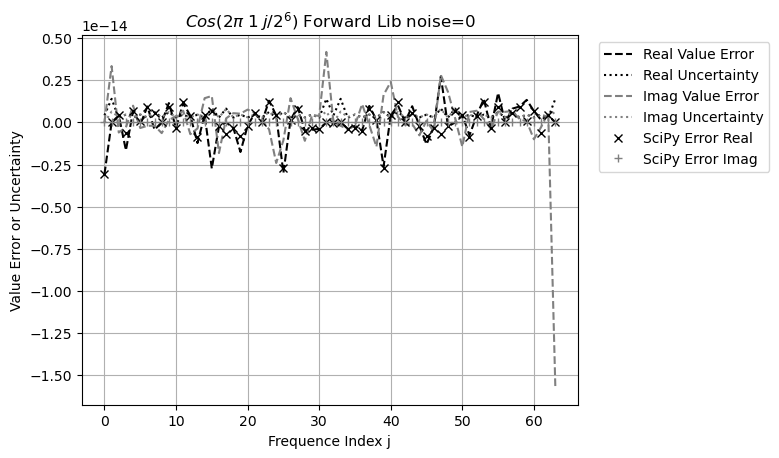

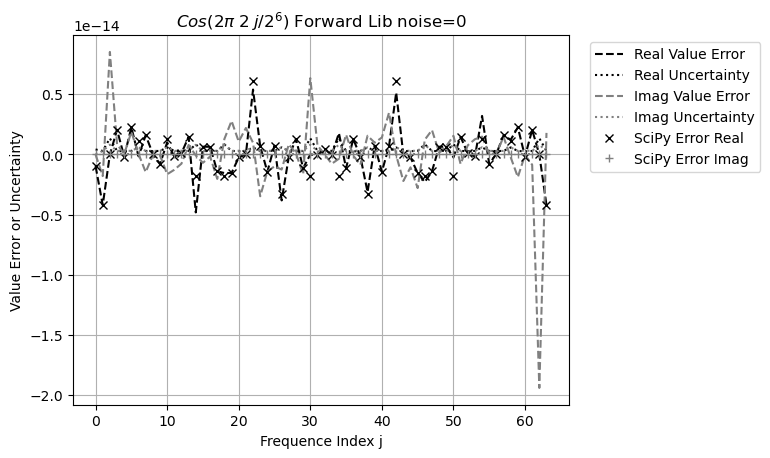

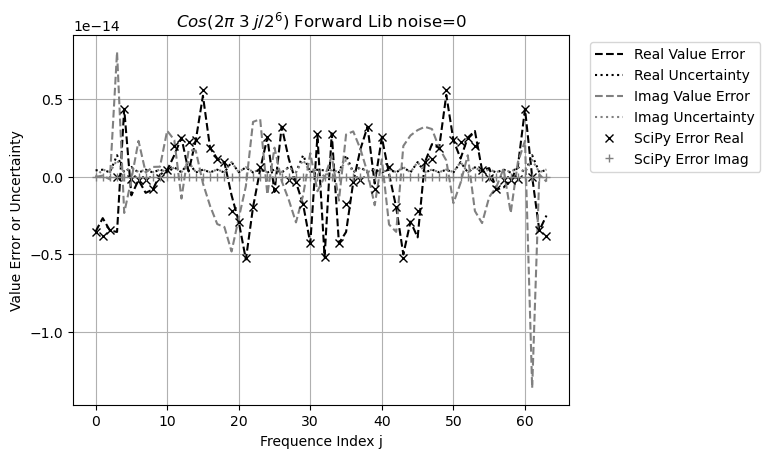

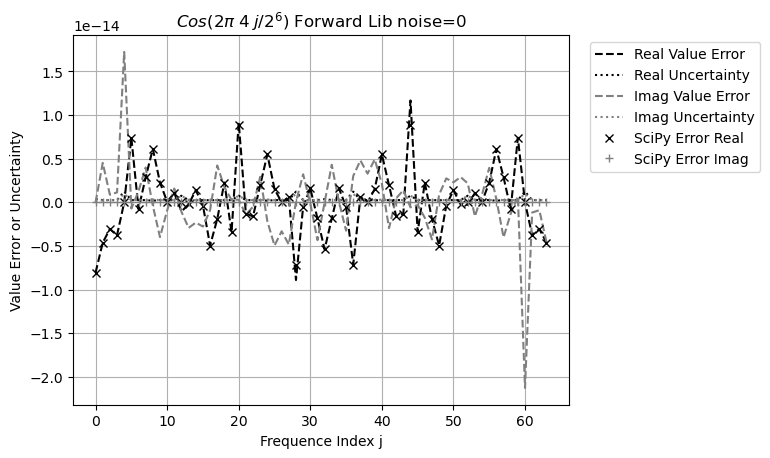

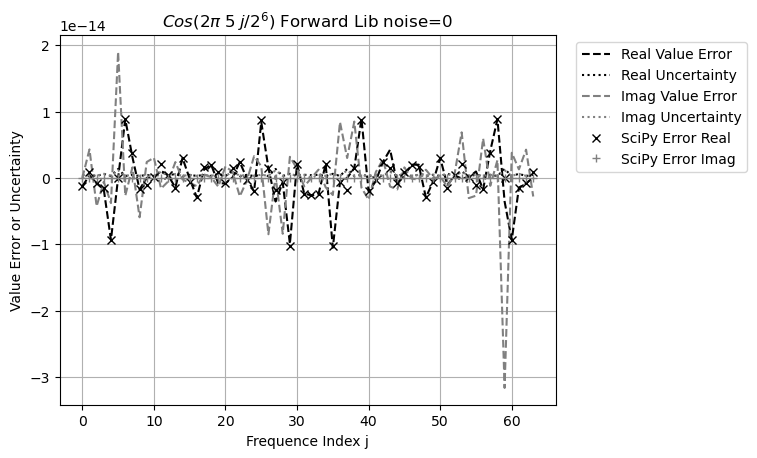

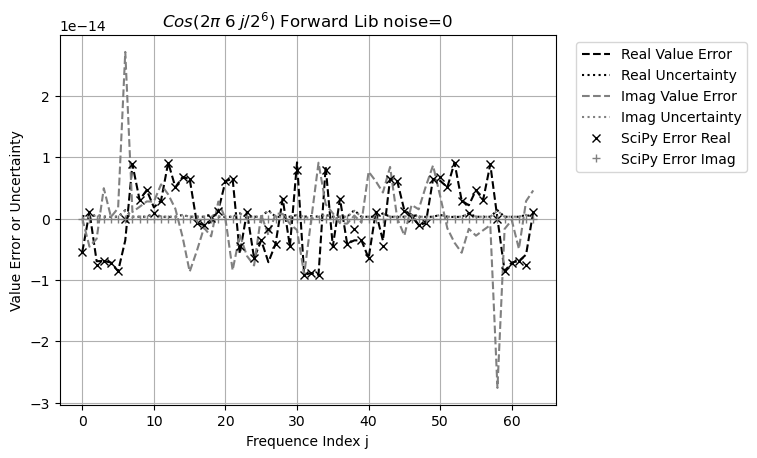

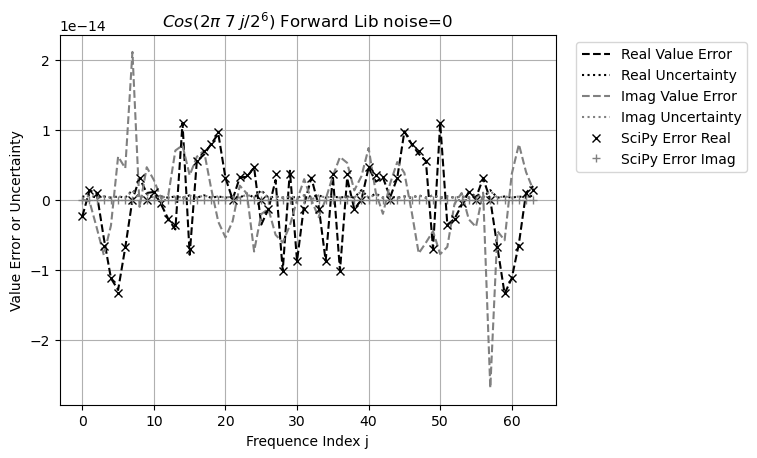

In [35]:
for freq in range(1, 8):
    PlotOutput(freq, 'Forward', signalType='Cos')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: Complex

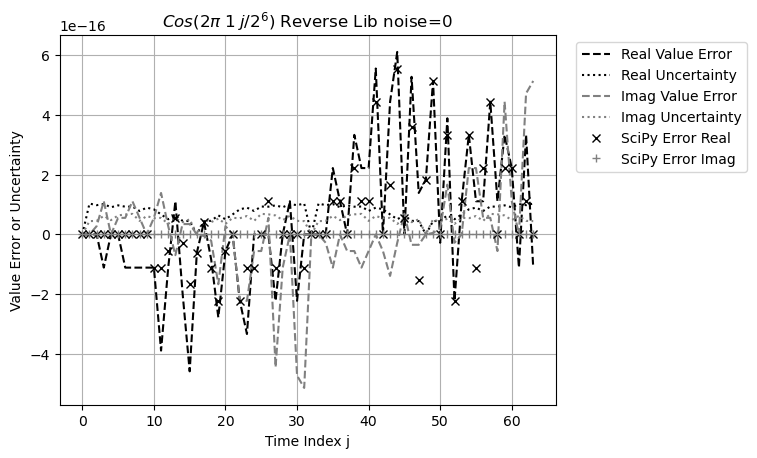

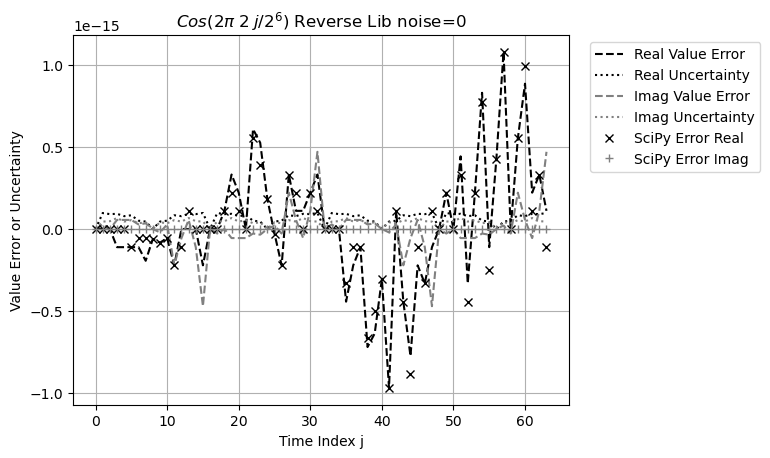

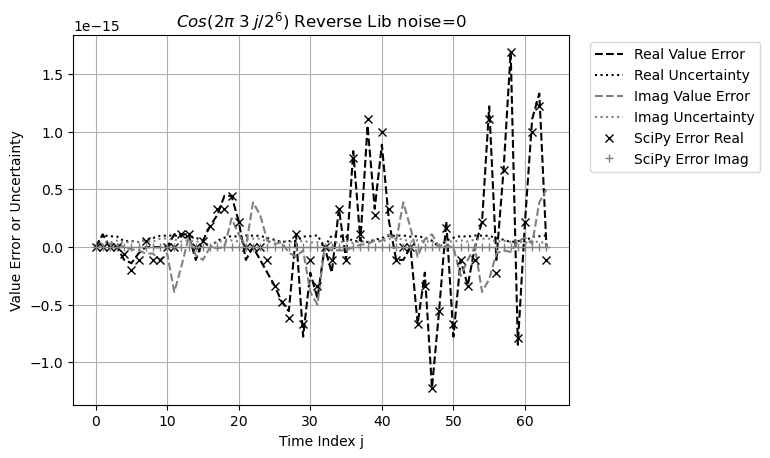

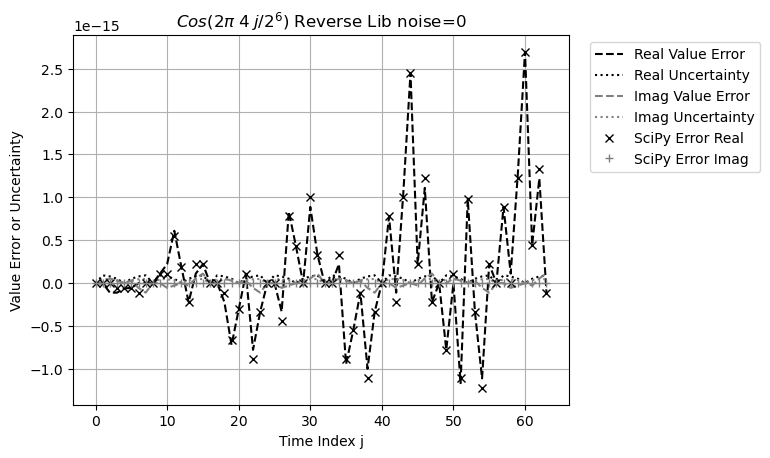

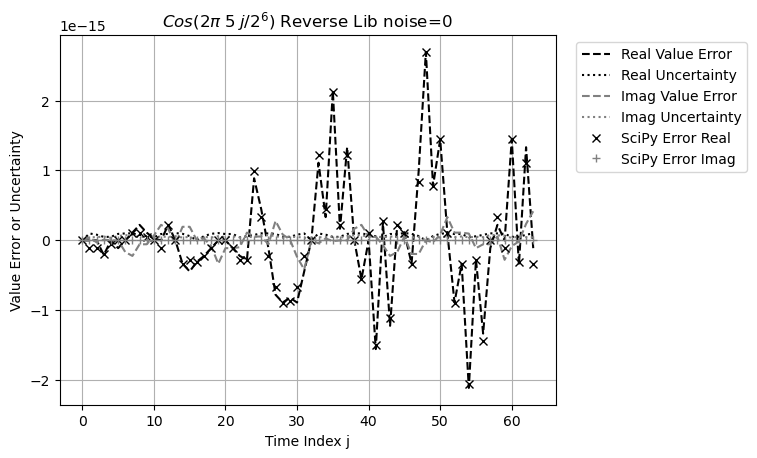

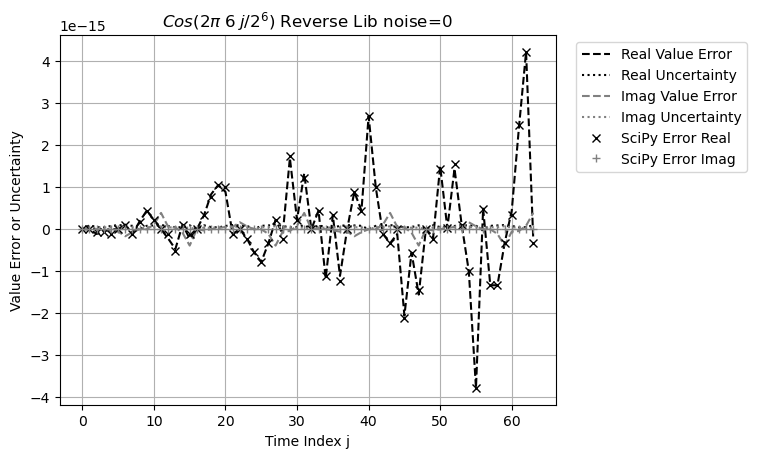

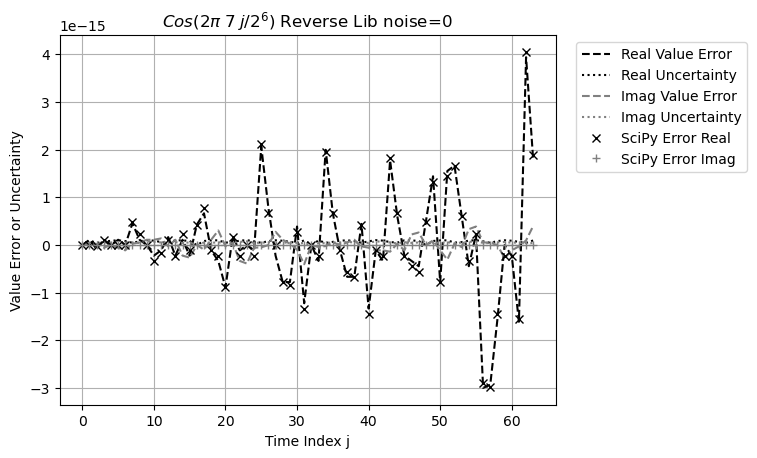

In [36]:
for freq in range(1, 8):
    PlotOutput(freq, 'Reverse', signalType='Cos')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


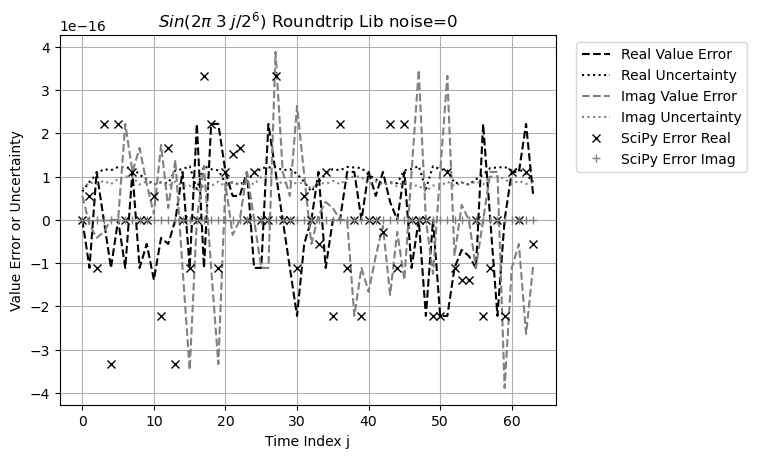

In [37]:
PlotOutput(3, 'Roundtrip')

# Different Order

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


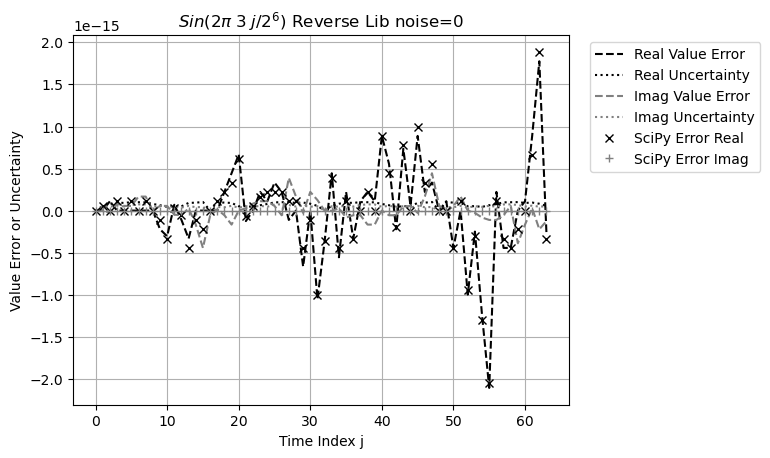

In [38]:
PlotOutput(3, 'Reverse')

In [39]:
df = pd.read_csv(f"../{CODE}/Output/FFT_Step_5_{SIN_SOURCE}.txt", sep='\t')
df.columns

Index(['SinSource', 'NoiseType', 'Noise', 'Signal', 'Order', 'Freq', 'Test',
       'Step', 'Imag', 'Value', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


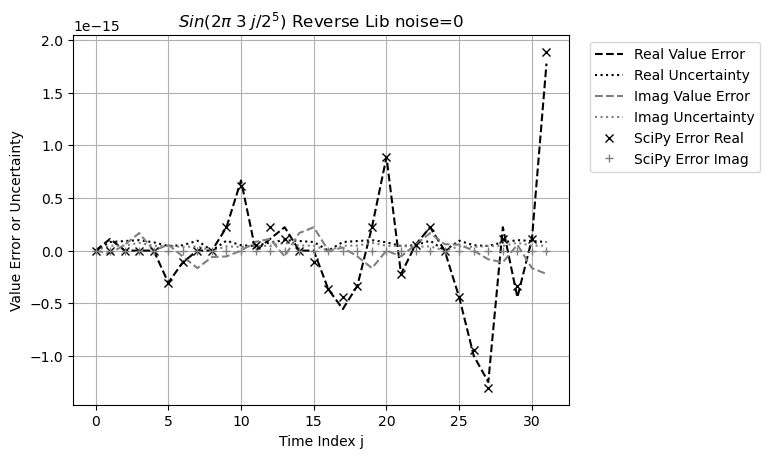

In [40]:
PlotOutput(3, 'Reverse', order=5)

In [41]:
df = pd.read_csv(f"../{CODE}/Output/FFT_Step_4_{SIN_SOURCE}.txt", sep='\t')
df.columns

Index(['SinSource', 'NoiseType', 'Noise', 'Signal', 'Order', 'Freq', 'Test',
       'Step', 'Imag', 'Value', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', '10', '11', '12', '13', '14', '15'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


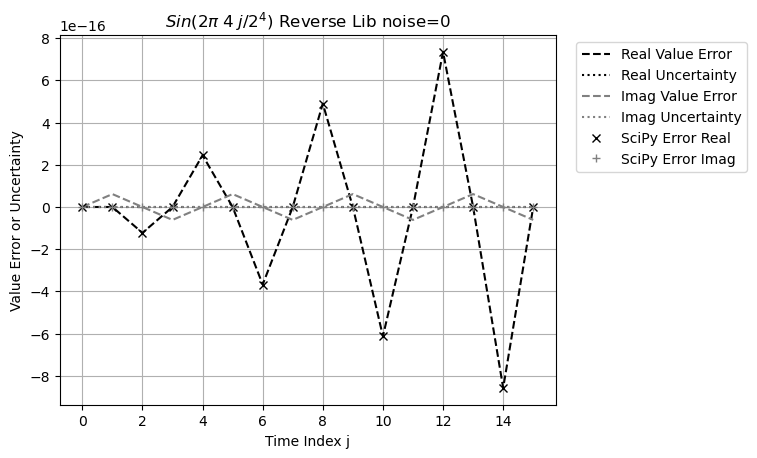

In [42]:
PlotOutput(4, 'Reverse', order=4)